# HeatMaps
---
Heatmaps for investigating functional clusters



In [1]:
from get_data import genepy_df, genepy_normalized, genepy_norm_loeuf, patient_phenotype


            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.097623  0.027245  0.107498  0.011378  0.041579  0.028535  0.055493   
AP0030  0.134882  0.000000  0.018830  0.064448  0.000000  0.015138  0.022460   
AP0045  0.107196  0.000000  0.025388  0.034014  0.000000  0.007506  0.030282   
AP0046  0.179652  0.000000  0.025081  0.118953  0.014841  0.007415  0.029915   
AP0055  0.091878  0.000000  0.038677  0.072722  0.008690  0.007527  0.080610   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.026087  0.010998   0.0   
AP0030  0.018639   0.0  0.004263  ...   0.0  0.011772  0.007656   0.0   
AP0045  0.000000   0.0  0.121555  ...   0.0  0.000000  0.010323   0.0   
AP0046  0.024826   0.0  0.000000  ...   0.0  0.000000  0.010197   0.0   
A

In [2]:
from get_data import CD_subset, UC_subset, IBDU_subset, NOT_IBD_subset

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# select genes 

GO_list = open("../Data/GO_regulation_immune.txt", "r")
data = GO_list.read()
data_list = data.split("\n")
print(data_list)
GO_list.close()

def pathway_genes(file):
    my_file = open(file, "r")
    data = my_file.read()
    data_list = data.split("\n")
    return(data_list)
GO_reg_immune = pathway_genes("../Data/GO_regulation_immune.txt")
GO_cytokine = pathway_genes("../Data/GO_Cytokine.txt")
KEGG_cytokine = pathway_genes("../Data/KEGG_cytokine.txt")

['GO:0002682', 'NOTCH1', 'NLRP3', 'STAT3', 'ERAP1', 'IL1RL1', 'TNFRSF4', 'TBX21', 'ITGAM', 'SOCS1', 'IL7R', 'NOD2', 'CD5', 'NOD1', 'CD4', 'AIRE', 'JAK2', 'LRRK2', 'CD8A', 'IL1B', 'IL23R', 'MADCAM1', 'CCL2', 'CCL8', 'FCGR2A', 'NFKB1', 'SMAD3', 'IL13', 'ICAM3', 'PTPN22', 'IL27', 'CARD9', 'CCL1', 'CCL20', 'CCL7', 'CD28', 'CD40', 'CRP', 'CSF2', 'CTLA4', 'CXCL8', 'CYLD', 'FCGR3A', 'FOXP3', 'ICAM1', 'IFNG', 'IL10', 'IL12B', 'IL17A', 'IL18', 'IL18R1', 'IL18RAP', 'IL1R1', 'IL2', 'IL2RA', 'IL4', 'IL5', 'IL6', 'IRGM', 'PLA2G2A', 'PTPN2', 'PTPRC', 'RAG1', 'STAT1', 'STAT5B', 'TLR4', 'TNFSF8', 'VEGFA', 'AGER', 'B7RP1', 'BTNL2', 'GPR29', 'HLA-DQA1', 'HLA-DRB1', 'HLA-DRB5', 'IRF1', 'LTA', 'PDCD1', 'TNF', '']


In [45]:
CD_go_cyto = CD_subset.loc[:, CD_subset.columns.isin(KEGG_cytokine)]

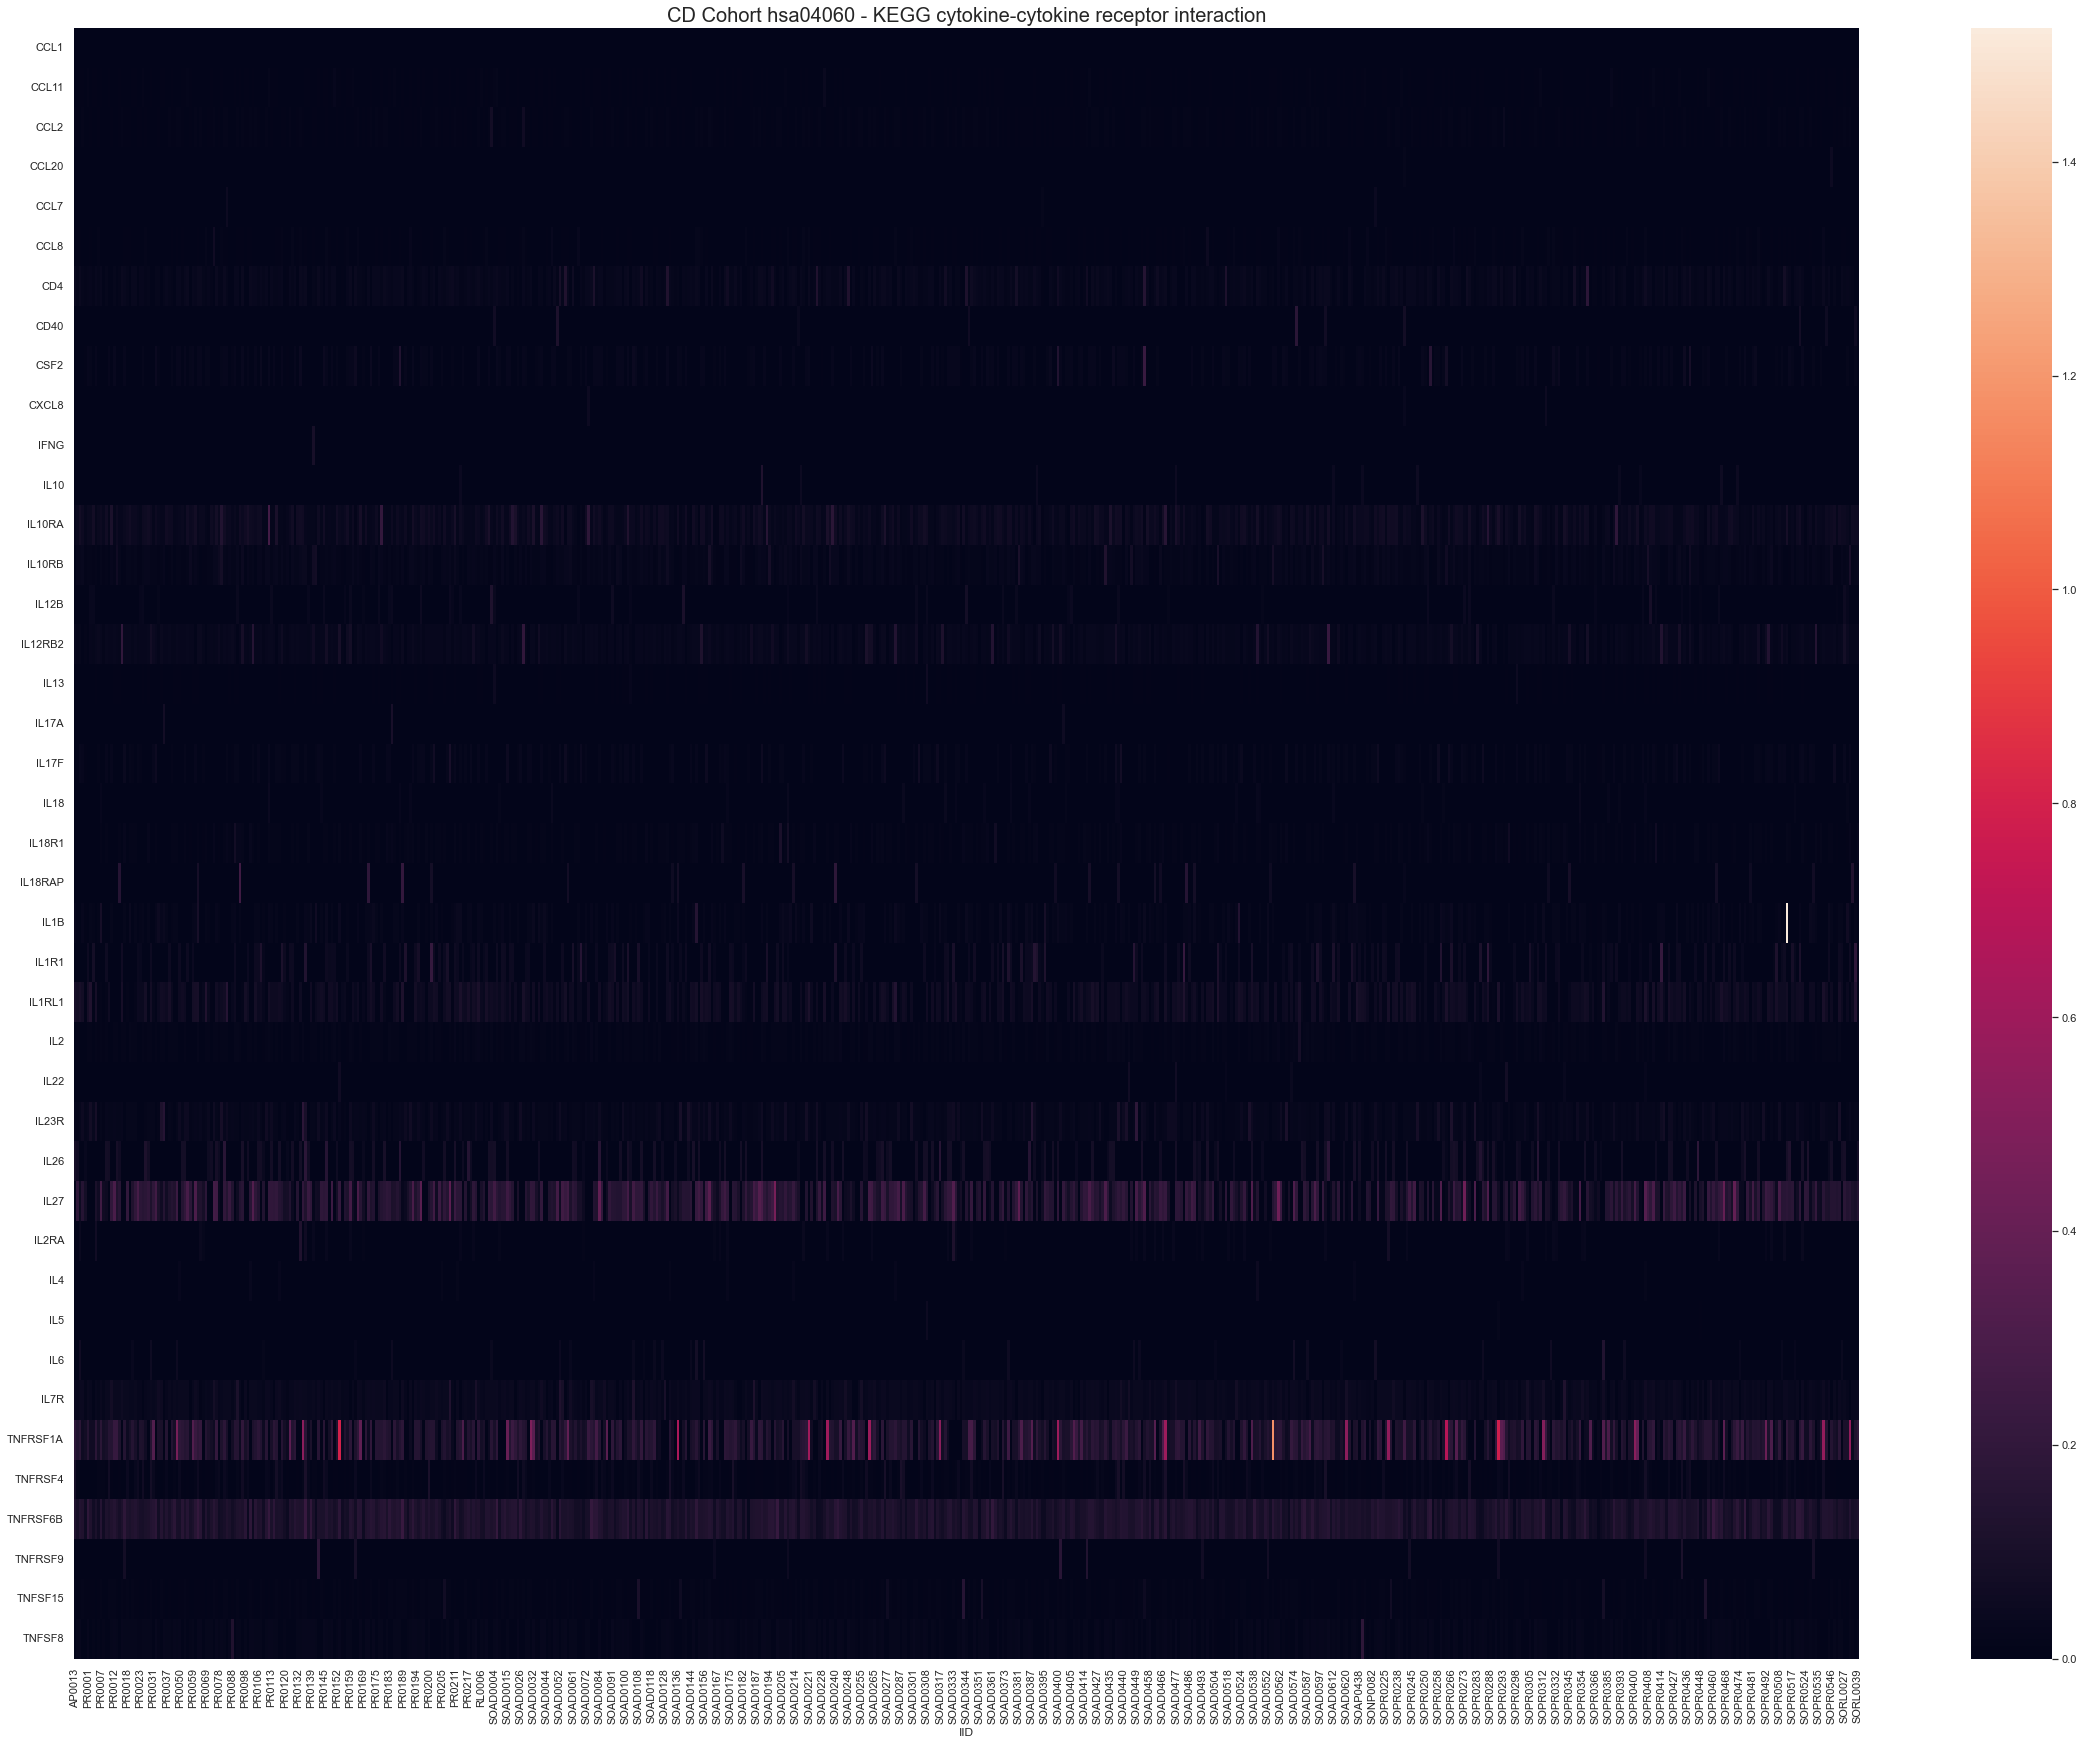

In [46]:
#fig, ax = plt.subplots(figsize=(7,5))
sns.set(rc = {'figure.figsize':(40,30)})
ax = plt.axes()
sns.heatmap(CD_go_cyto.transpose())
ax.set_title('CD Cohort hsa04060 - KEGG cytokine-cytokine receptor interaction',fontsize=20)
plt.savefig('heat3CD.png', dpi=300)

In [17]:
sorted_sub = CD_subset.sort_values(by=['TRIP12','CNOT3','CNOT1','KDM3B'])

In [18]:
cnot = pathway_genes("../Data/transcription_nodes.txt")
subPR = sorted_sub.loc[:, sorted_sub.columns.isin(cnot)]

<AxesSubplot:xlabel='IID'>

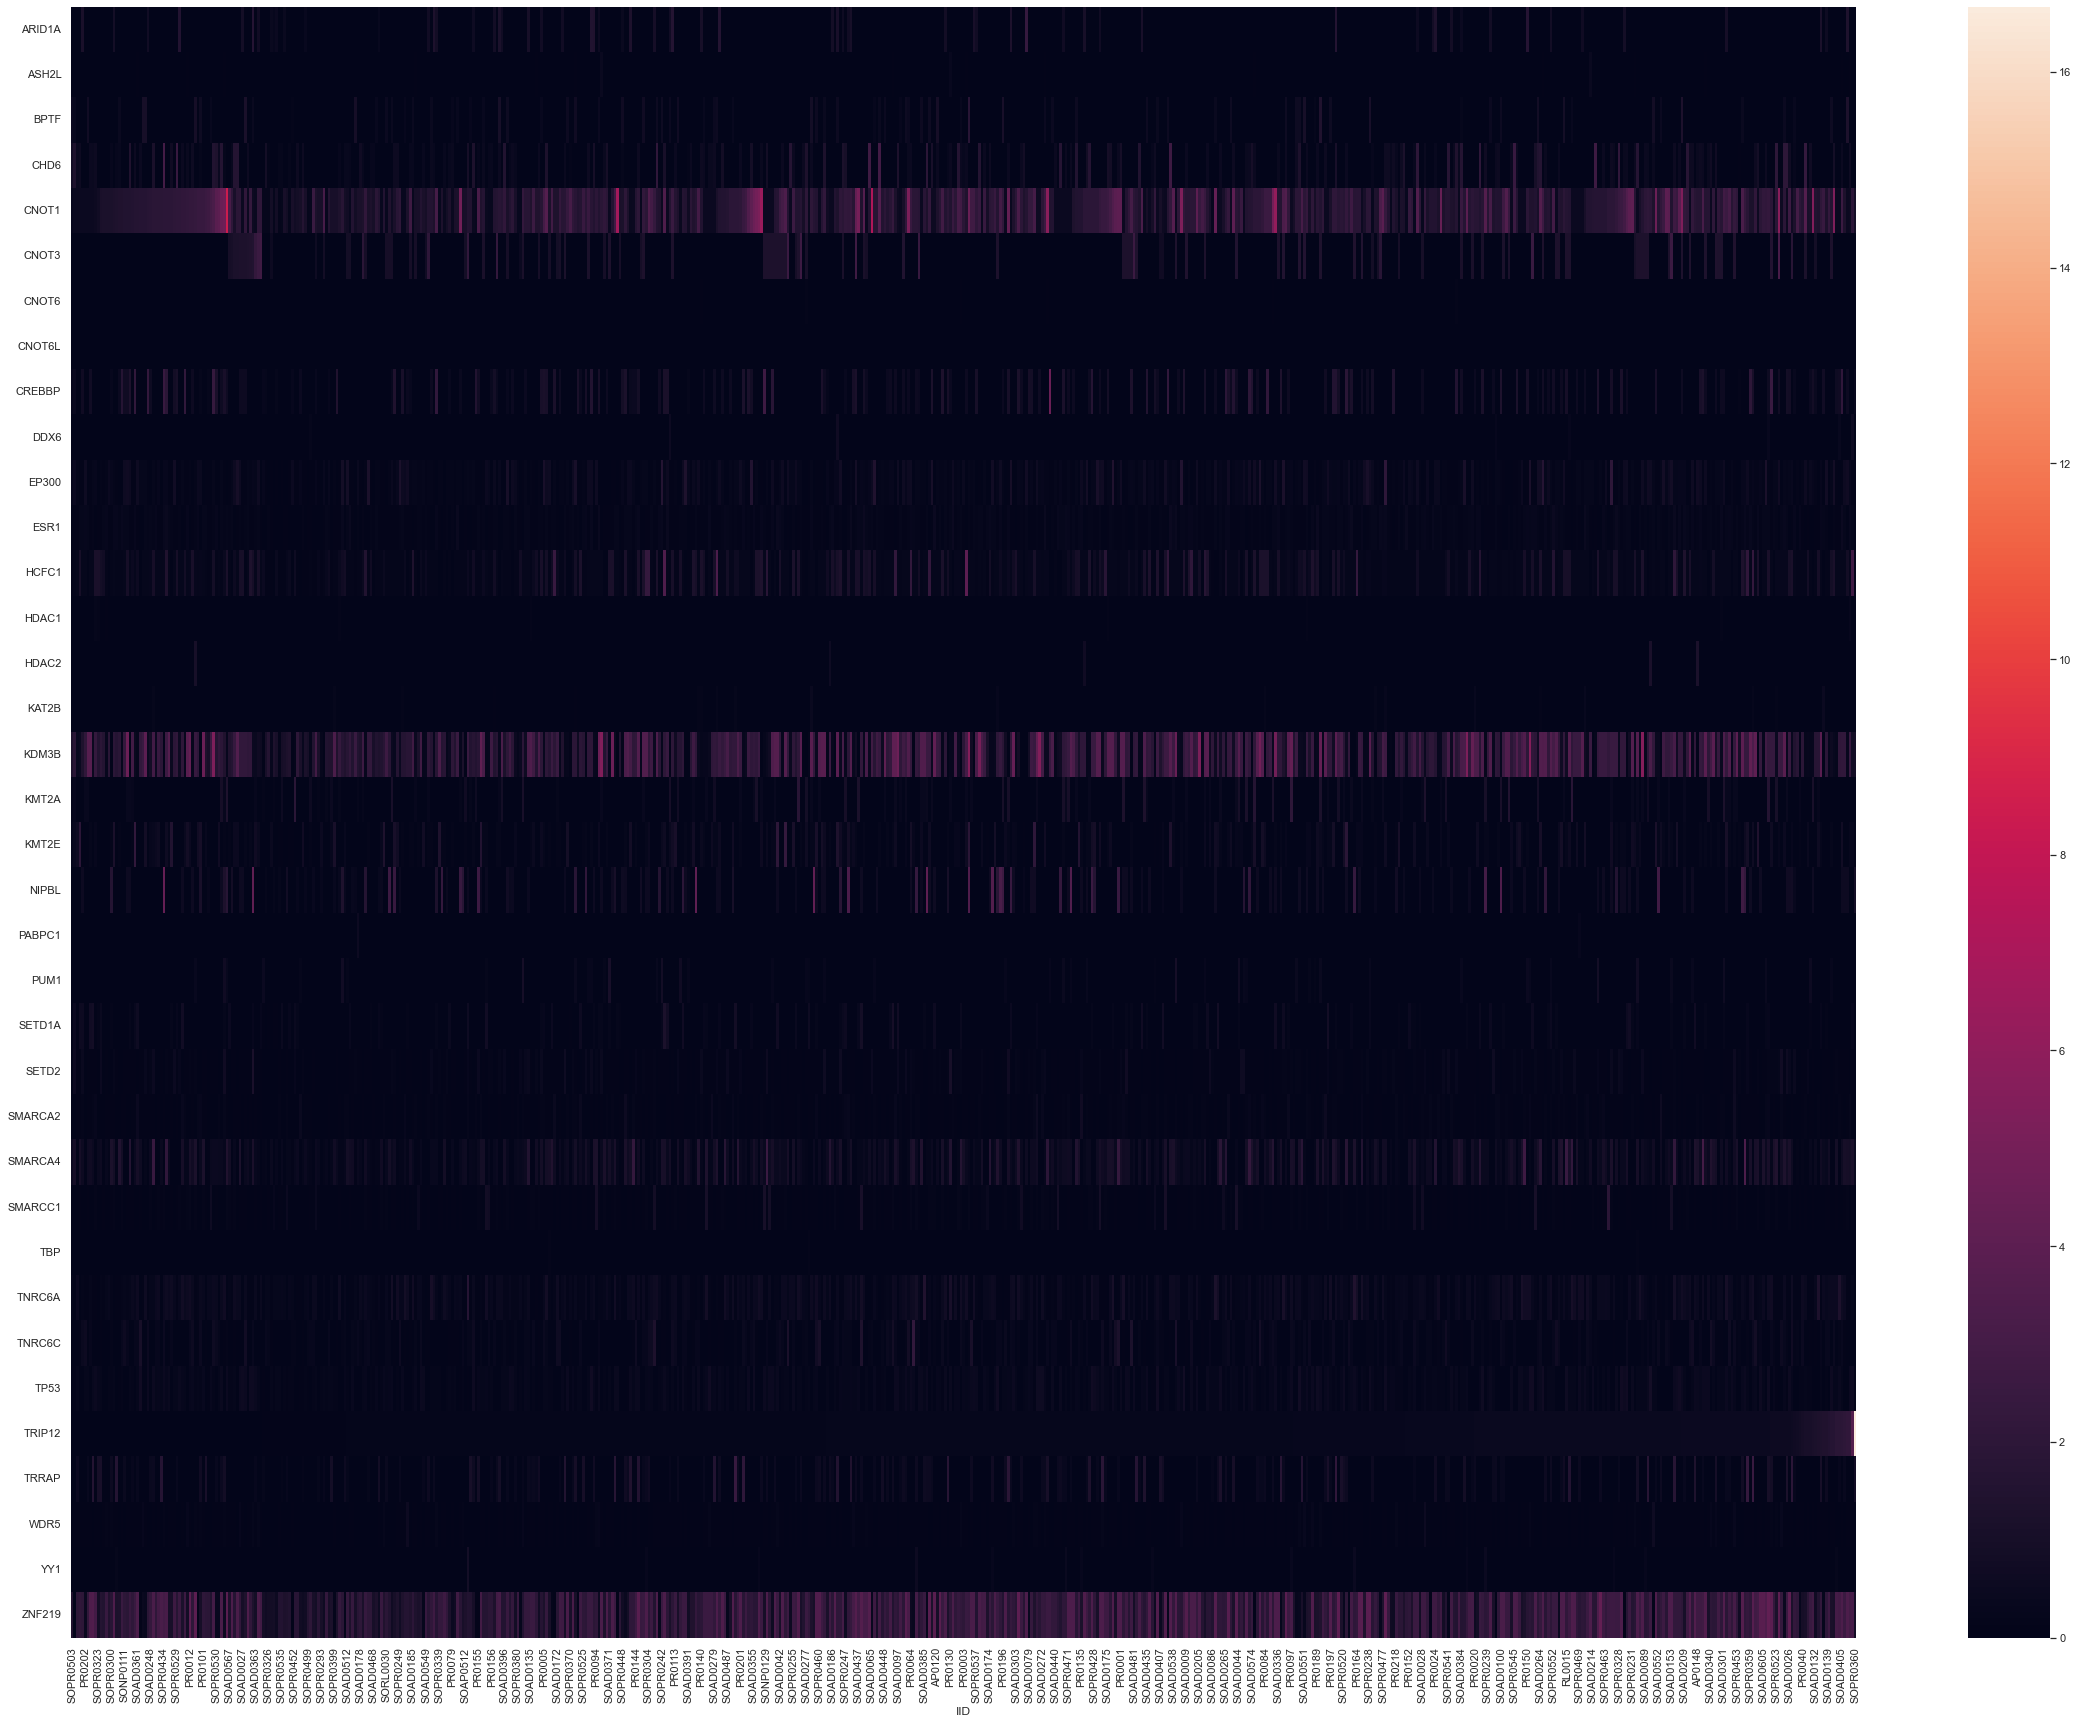

In [20]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPR.transpose())
#plt.savefig('cnot.png', dpi=300)

In [31]:
import get_patient
SOAD0143 = get_patient.get_patient_as_Series(CD_subset, 'SOAD0143')
SOAD0143.sort_values(ascending = False).head(20)


CCDC22     1.927660
AHSA1      1.471464
MRC1       1.372946
ATRX       1.310402
MUC5B      1.100017
DENND5B    1.059860
GNB1       1.019251
MUC19      1.016260
PLEC       1.014324
UBR5       0.982601
GRIPAP1    0.967653
RNF126     0.950569
LRP1       0.942733
ZNF217     0.931360
FRMPD4     0.918869
MUC16      0.839726
RSF1       0.834770
RET        0.830622
ARMCX4     0.821317
LMNB2      0.815189
Name: SOAD0143, dtype: float64

In [28]:
SOPR0368 = get_patient.get_patient_as_Series(CD_subset, 'SOPR0368')
SOPR0368.sort_values(ascending = False).head(20)

EIF4G2      4.392681
COL3A1      3.549391
USP9X       2.456847
XPO1        1.565120
UBA1        1.409211
HNRNPU      1.386328
CCT3        1.362931
ATP5F1B     1.000000
CCT4        0.968719
KDM3B       0.942932
EEF2        0.899759
CBX3        0.749919
NCL         0.670650
ZNF219      0.660331
PRKDC       0.646989
DDX3X       0.616685
SPARC       0.602064
KIAA1671    0.558034
MUC5B       0.522624
SPTBN1      0.512597
Name: SOPR0368, dtype: float64

In [29]:
PR0063= get_patient.get_patient_as_Series(CD_subset, 'PR0063')
PR0063.sort_values(ascending = False).head(20)

CNOT1       5.493132
ZNF219      2.783771
CUX1        2.559153
SRRM2       2.539069
PLXNA3      2.339247
KIAA1671    2.304147
MRC1        2.100562
ARMCX4      2.006777
CCDC22      1.803237
PREX1       1.588256
JPH3        1.561151
CHD2        1.525409
AHSA1       1.517197
GNB1        1.499354
GRIPAP1     1.450091
ZNF777      1.335702
ZFHX3       1.285864
RNF126      1.278612
SZT2        1.244330
CDC73       1.235532
Name: PR0063, dtype: float64